In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Define the basis vectors as columns of a matrix
basis = np.array([
    [.55, .93, .93],  # Mood Color -- separated out (space U)
    [.6, 0, .6],  # other basis 1 (space W)
    [0, .2, .6]   # other basis 2 (space W)
])

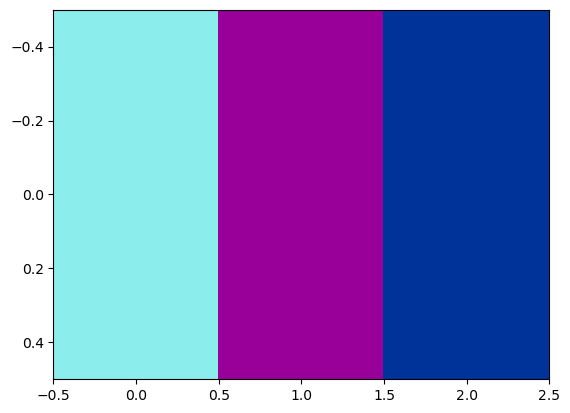

In [53]:
# print basis colors for reference
plt.imshow([basis], aspect='auto')

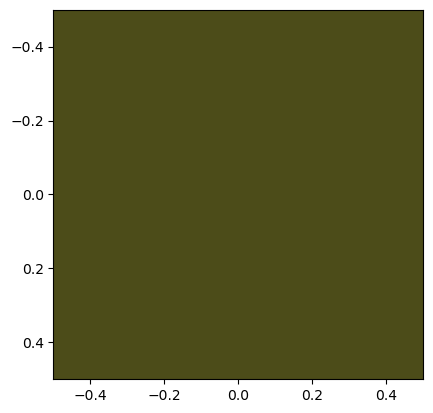

In [54]:
# Here is a single pixel in RGB space
pixel = np.array([[.3, .3, .1]])
plt.imshow([pixel])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


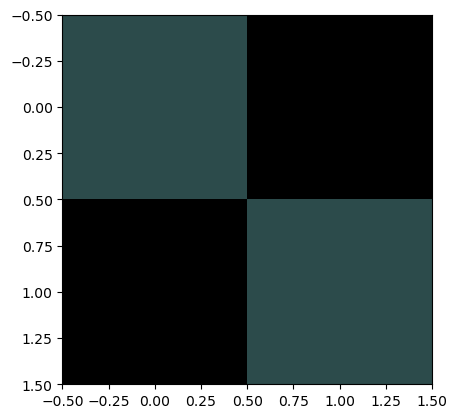

In [55]:
def expand_pixel(pixel:np.array, basis:np.array) -> np.ndarray:
    """Returns a 2x2 block of pixels broken down (approximately) by the U-W basis"""

    # expand each pixel to a 2x2 block
    coefficients = np.linalg.solve(basis, pixel[0])
    # print(coefficients)

    # compute 2x2 block 
    expanded_pixel = np.zeros((2, 2, 3))

    # The first and fourth pixels in U
    expanded_pixel[:][0][0] = coefficients[0] * basis[0]
    expanded_pixel[:][1][1] = coefficients[0] * basis[0]

    # The second and third pixels in W
    expanded_pixel[:][0][1] = coefficients[1] * basis[1]
    expanded_pixel[:][1][0] = coefficients[1] * basis[1]

    return expanded_pixel

expanded_pixel = expand_pixel(pixel, basis)

# print colors of expanded_pixel
plt.imshow(expanded_pixel)



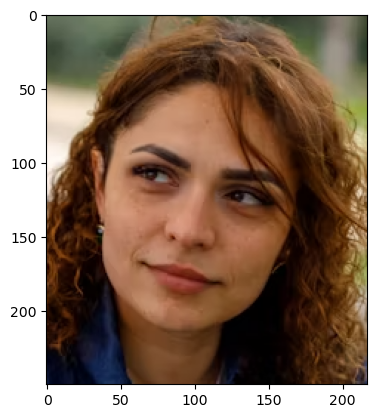

In [56]:
# read image from file
import matplotlib.image as mpimg
img = mpimg.imread('ambiguous.png')
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


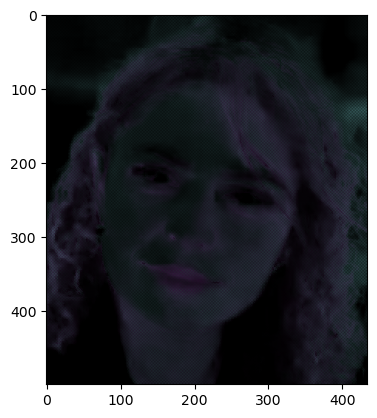

In [57]:
# recreate image using expand pixel 
expanded_img = np.zeros((img.shape[0] * 2, img.shape[1] * 2, 3))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        expanded_img[2*i:2*i+2, 2*j:2*j+2] = expand_pixel([img[i][j]], basis)

plt.imshow(expanded_img)
plt.show()